Load libraties to be used

In [1]:
# Import TensorFlow
import tensorflow

# Import Numpy and Matplotlib
import numpy
import matplotlib.pyplot

import random

Load datasets

In [2]:
x_train = numpy.load("x_train.npy")
y_train = numpy.load("y_train.npy")
z_train = numpy.load("z_train.npy")
x_test = numpy.load("x_test.npy")
y_test = numpy.load("y_test.npy")
z_test = numpy.load("z_test.npy")
x_valid = numpy.load("x_valid.npy")
y_valid = numpy.load("y_valid.npy")
z_valid = numpy.load("z_valid.npy")

In [3]:
x_train[3142]

array([[[0.00178824],
        [0.00178824],
        [0.00178824],
        ...,
        [0.00178824],
        [0.00178824],
        [0.00178824]],

       [[0.00178824],
        [0.00178824],
        [0.00178824],
        ...,
        [0.00178824],
        [0.00178824],
        [0.00178824]],

       [[0.00178824],
        [0.00178824],
        [0.00178824],
        ...,
        [0.00178824],
        [0.00178824],
        [0.00178824]],

       ...,

       [[0.05659216],
        [0.10006275],
        [0.10006275],
        ...,
        [0.03453726],
        [0.03453726],
        [0.00178824]],

       [[0.02927451],
        [0.04970981],
        [0.04970981],
        ...,
        [0.15077647],
        [0.15077647],
        [0.00178824]],

       [[0.02927451],
        [0.04970981],
        [0.04970981],
        ...,
        [0.15077647],
        [0.15077647],
        [0.00178824]]])

Load a random spectogram

In [4]:
y_train[3142]

2.0

In [5]:
z_train[3142]

'97317-2-0-25.png'

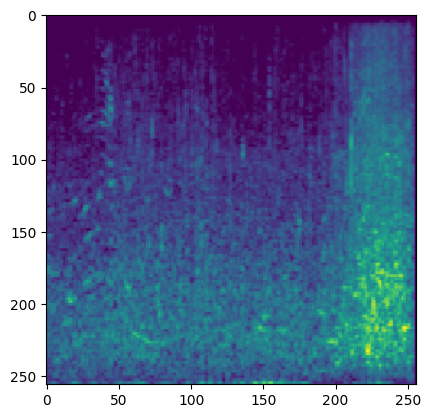

In [6]:
matplotlib.pyplot.imshow(x_train[2658])
matplotlib.pyplot.show()

Create the model

In [7]:
model = tensorflow.keras.Sequential()

Add convolution and max pooling layers

In [8]:
model.add(tensorflow.keras.layers.Conv2D(32,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding= "same",
                                 activation ="relu",
                                 input_shape =(256,256,1)))

model.add(tensorflow.keras.layers.MaxPooling2D((2,2)))


model.add(tensorflow.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides = (1,1),
                                 padding = "same",
                                 activation = "relu"))

model.add(tensorflow.keras.layers.MaxPooling2D((2,2)))


model.add(tensorflow.keras.layers.Conv2D(64,
                                 kernel_size = (3,3),
                                 strides =(1,1),
                                 padding = "same",
                                 activation = "relu"))

flatten the convolution layer

In [9]:
# Flatten the convolution layer
model.add(tensorflow.keras.layers.Flatten())

classification layers

In [10]:
# Add the dense layer and dropout layer
model.add(tensorflow.keras.layers.Dense(64, activation = "relu"))
model.add(tensorflow.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tensorflow.keras.layers.Dense(64, activation = "relu"))
model.add(tensorflow.keras.layers.Dropout(0.5))

output layer

In [11]:
# Add the output layer
model.add(tensorflow.keras.layers.Dense(10,activation ="softmax"))

Optimise

In [12]:
# Compile the model
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

Train Model

In [13]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(x_train, y_train,
                    batch_size = 128,
                    epochs = 15,
                    validation_data = (x_valid, y_valid))

Epoch 1/15
55/55 [==============================] - 169s 3s/step - loss: 2.2349 - accuracy: 0.1884 - val_loss: 1.8455 - val_accuracy: 0.4250
Epoch 2/15
55/55 [==============================] - 166s 3s/step - loss: 1.8945 - accuracy: 0.3249 - val_loss: 1.5027 - val_accuracy: 0.5349
Epoch 3/15
55/55 [==============================] - 165s 3s/step - loss: 1.6449 - accuracy: 0.4154 - val_loss: 1.2241 - val_accuracy: 0.6140
Epoch 4/15
55/55 [==============================] - 164s 3s/step - loss: 1.4784 - accuracy: 0.4685 - val_loss: 1.0703 - val_accuracy: 0.6655
Epoch 5/15
55/55 [==============================] - 164s 3s/step - loss: 1.3216 - accuracy: 0.5302 - val_loss: 0.9771 - val_accuracy: 0.7148
Epoch 6/15
55/55 [==============================] - 164s 3s/step - loss: 1.1934 - accuracy: 0.5764 - val_loss: 0.8363 - val_accuracy: 0.7468
Epoch 7/15
55/55 [==============================] - 164s 3s/step - loss: 1.0833 - accuracy: 0.6061 - val_loss: 0.7062 - val_accuracy: 0.7869
Epoch 8/15
55

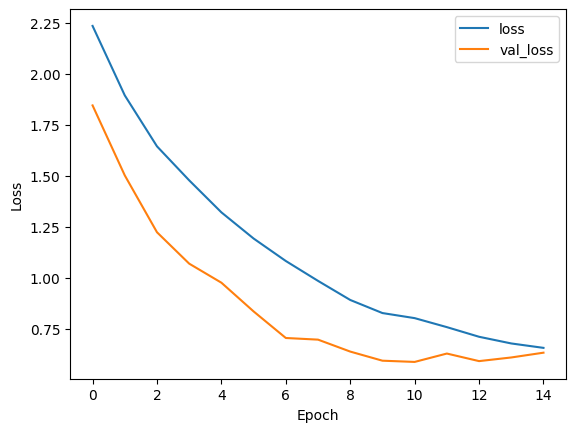

In [14]:
# Plot the the training loss
matplotlib.pyplot.plot(results.history["loss"],label = "loss")

# Plot the the validation loss
matplotlib.pyplot.plot(results.history["val_loss"], label = "val_loss")

# Name the x and y axises
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Loss")

# Put legend table
matplotlib.pyplot.legend()

# Show the plot
matplotlib.pyplot.show()

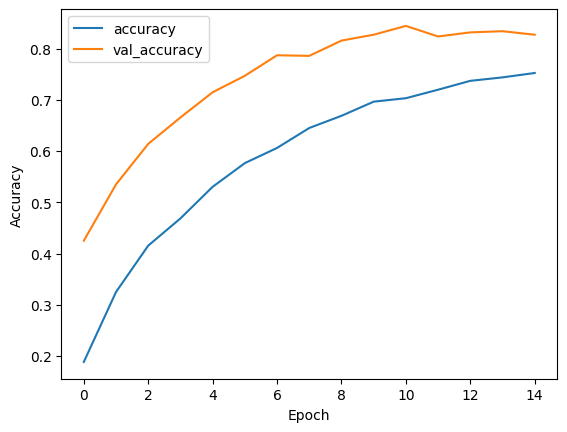

In [15]:
# Plot the the training accuracy
matplotlib.pyplot.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
matplotlib.pyplot.plot(results.history["val_accuracy"], label = "val_accuracy")

# Name the x and y axises
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Accuracy")
# Put legend table
matplotlib.pyplot.legend()

# Show the plot
matplotlib.pyplot.show()

In [16]:
# Evaluate the performance
model.evaluate(x_test, y_test)

28/28 [==============================] - 5s 189ms/step - loss: 0.5847 - accuracy: 0.8385


[0.5846534967422485, 0.838487982749939]

In [17]:
# Make prediction on the reshaped sample
randomSpec = random.randint(0,len(x_test)-1)

prediction_result = model.predict(x_test[randomSpec].reshape(1,256,256,1))

# Print the prediction result
prediction_result

1/1 [==============================] - 0s 105ms/step


array([[2.9573604e-05, 4.7036472e-08, 1.4401397e-09, 7.8582749e-09,
        1.2042590e-02, 8.2007062e-04, 6.2159562e-09, 9.8709923e-01,
        8.4105068e-06, 5.7204932e-08]], dtype=float32)

In [18]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [19]:
# Print the results
print(f"This recording belongs to the {predicted_class}, with the chance of {predicted_probability} %")

Bu ses, % 0.9870992302894592 ihtimalle 7 sınıfına ait


In [20]:
if predicted_class == y_test[randomSpec]:
  print("Successfull!!")
else:
  print("Unfortunately!!")

Successfull!!


In [21]:
print(z_test[randomSpec])

104998-7-7-4.png
